In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
tf.__version__

'2.7.0'

# Preprocessing

In [3]:
dataset = pd.read_csv('StudentsPerformance.csv')

dataset.columns=['gender','groups_rac','edu','lunch','mathScore','readingScore','writingScore','result']
#dataset.head()

dataset = pd.concat([dataset,pd.get_dummies(dataset['gender'],prefix='gender',drop_first=True)],axis=1);
dataset.drop(['gender'],axis=1,inplace=True)

dataset


,groups_rac,edu,lunch,mathScore,readingScore,writingScore,result,gender_male
0,group B,bachelor's degree,standard,72,72,74,none,0
1,group C,some college,standard,69,90,88,completed,0
2,group B,master's degree,standard,90,95,93,none,0
3,group A,associate's degree,free/reduced,47,57,44,none,1
4,group C,some college,standard,76,78,75,none,1
...,...,...,...,...,...,...,...,...
995,group E,master's degree,standard,88,99,95,completed,0
996,group C,high school,free/reduced,62,55,55,none,1
997,group C,high school,free/reduced,59,71,65,completed,0
998,group D,some college,standard,68,78,77,completed,0


In [4]:
dataset = pd.concat([dataset,pd.get_dummies(dataset['groups_rac'],prefix='groups_rac',drop_first=True)],axis=1);
dataset.drop(['groups_rac'],axis=1,inplace=True)

dataset = pd.concat([dataset,pd.get_dummies(dataset['edu'],prefix='edu',drop_first=True)],axis=1);
dataset.drop(['edu'],axis=1,inplace=True)

dataset.head()

,lunch,mathScore,readingScore,writingScore,result,gender_male,groups_rac_group B,groups_rac_group C,groups_rac_group D,groups_rac_group E,edu_bachelor's degree,edu_high school,edu_master's degree,edu_some college,edu_some high school
0,standard,72,72,74,none,0,1,0,0,0,1,0,0,0,0
1,standard,69,90,88,completed,0,0,1,0,0,0,0,0,1,0
2,standard,90,95,93,none,0,1,0,0,0,0,0,1,0,0
3,free/reduced,47,57,44,none,1,0,0,0,0,0,0,0,0,0
4,standard,76,78,75,none,1,0,1,0,0,0,0,0,1,0


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

dataset['lunch'] = le.fit_transform(dataset['lunch']) 

map_dic = {"none":0,"completed":1}
dataset['result'] = dataset['result'].map(map_dic)

dataset = dataset[["gender_male","groups_rac_group B","groups_rac_group C","groups_rac_group D","groups_rac_group E",
                   "edu_some high school","edu_bachelor's degree","edu_high school","edu_master's degree","edu_some college",
                   "lunch","mathScore","readingScore","writingScore","result"]]

dataset.tail()

,gender_male,groups_rac_group B,groups_rac_group C,groups_rac_group D,groups_rac_group E,edu_some high school,edu_bachelor's degree,edu_high school,edu_master's degree,edu_some college,lunch,mathScore,readingScore,writingScore,result
995,0,0,0,0,1,0,0,0,1,0,1,88,99,95,1
996,1,0,1,0,0,0,0,1,0,0,0,62,55,55,0
997,0,0,1,0,0,0,0,1,0,0,0,59,71,65,1
998,0,0,0,1,0,0,0,0,0,1,1,68,78,77,1
999,0,0,0,1,0,0,0,0,0,1,0,77,86,86,0


In [6]:
X = dataset.iloc[:, :-1].values
y = dataset['result'].values
print(X[7])


[ 1  1  0  0  0  0  0  0  0  1  0 40 43 39]


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 )

In [8]:
print(X_test)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#print(X_test)

[[ 1  0  0 ... 47 57 44]
 [ 0  0  0 ... 65 75 77]
 [ 1  0  1 ... 86 81 80]
 ...
 [ 1  0  0 ... 64 60 58]
 [ 0  0  1 ... 65 77 74]
 [ 1  0  0 ... 75 81 74]]


In [9]:
len(X_train)

800

In [10]:
len(X_test)

200

# svm

In [11]:
from sklearn.svm import SVC
model=SVC(kernel = 'linear',gamma=1 , probability=True)

In [12]:
model.fit(X_train,y_train)

SVC(gamma=1, kernel='linear', probability=True)

In [13]:
model.score(X_test,y_test)

0.735

In [14]:
print(model.predict(sc.transform([[ 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0  ,0 , 1 , 0 ,40 ,43, 39]])))

[0]


In [15]:
print(model.predict(sc.transform([[ 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0  ,0 , 1 , 0 ,40 ,43, 39]])) > 0.6)

[False]


In [16]:
model_linear_kernal=SVC(kernel='linear')
model_linear_kernal.fit(X_train,y_train)
model_linear_kernal.score(X_test,y_test)
model_linear_kernal.score(X_test,y_test)

0.735

In [17]:
 model.fit(X_train, y_train)

SVC(gamma=1, kernel='linear', probability=True)

In [18]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]

# confusion_matrix &&  accuracy_score

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[109  16]
 [ 37  38]]


0.735

In [20]:
y_pred = model.predict(X_test).ravel()
#print(X_test)

# ROC MOdel

In [21]:
#prediction for X_test(200) value 
for i in range(len(y_test)):
    sv_pro = model.predict_proba(X_test)
#print(sv_pro)

In [22]:
 sv_pro = sv_pro[:, 1]

In [23]:
from sklearn.metrics import roc_curve,  roc_auc_score
# total score
sv_auc = roc_auc_score(y_test , sv_pro )

In [24]:
sv_fpr , sv_tpr , _  = roc_curve(y_test , sv_pro )

In [25]:
from sklearn.metrics import roc_curve, auc

C:\Users\DELL\AppData\Local\Temp/ipykernel_14056/2325399947.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(sv_fpr , sv_tpr , lineStyle='dotted' , label='Support Vector Machine (AUROC = %0.3f)' %sv_auc)


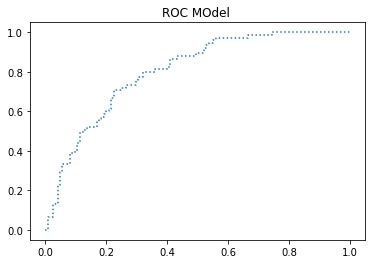

In [26]:
import matplotlib.pyplot as plt


plt.plot(sv_fpr , sv_tpr , lineStyle='dotted' , label='Support Vector Machine (AUROC = %0.3f)' %sv_auc)

plt.title('ROC MOdel ')

plt.show()

#  accuracy curve

In [27]:
history =[]
for i in range(len(y_test)):
    model_C=SVC(C=i+1)
    model_C.fit(X_train,y_train)
    model_C.score(X_test,y_test)
    history.append(model_C.score(X_test,y_test)) 

    
    
#print(history)

In [28]:
accuracy_x =[] 
accuracy_y= []


for i in range(len(y_test)):
    accuracy_x.append(i+1)
    
for i in range(len(history)):
    accuracy_y.append(history[i])
    
    
#print(accuracy_x)
print(accuracy_y)

[0.68, 0.675, 0.69, 0.685, 0.695, 0.7, 0.695, 0.695, 0.7, 0.695, 0.7, 0.7, 0.695, 0.7, 0.7, 0.695, 0.685, 0.685, 0.685, 0.685, 0.685, 0.685, 0.68, 0.675, 0.67, 0.675, 0.67, 0.67, 0.665, 0.665, 0.665, 0.67, 0.665, 0.665, 0.67, 0.675, 0.685, 0.685, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.695, 0.695, 0.695, 0.695, 0.695, 0.695, 0.695, 0.695, 0.695, 0.695, 0.695, 0.695, 0.695, 0.695, 0.695, 0.695, 0.695, 0.695, 0.695, 0.695, 0.695, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.695, 0.695, 0.695, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.695, 0.695, 0.695, 0.695, 0.69, 0.68, 0.68, 0.675, 0.68, 0.68, 0.68, 0.685, 0.685, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.685, 0.685, 0.685, 0.685, 0.685, 0.685, 0.685, 0.685, 0.685, 0.685, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 

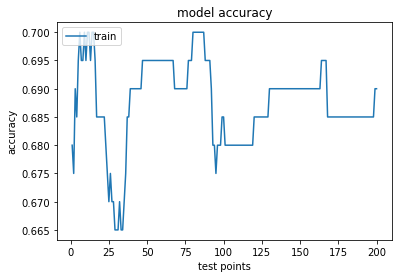

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(accuracy_x,accuracy_y)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('test points')
plt.legend(['train'] , loc='upper left')
plt.show()

#  loss curve && loss_score

In [30]:
from sklearn.metrics import brier_score_loss
brier_score_loss(y_test, y_pred)

0.265

In [31]:
loss_x =[] 
loss_y= []

full_score = 1

for i in range(len(y_test)):
    loss_x.append(i+1)
    
for i in range(len(history)):
    loss_y.append(full_score - history[i])
    
#print(loss_y)

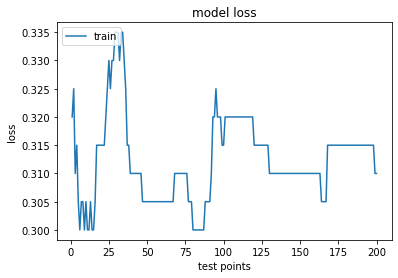

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(loss_x,loss_y)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('test points')
plt.legend(['train'] , loc='upper left')
plt.show()

# learning curve

In [33]:
from sklearn.model_selection import learning_curve

In [34]:
train_sizes, train_scores, test_scores = learning_curve(model,
                                                        X_test, y_test, cv=10, scoring='accuracy',
                                                        train_sizes=np.linspace(0.01, 1.0, 50))
    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 558, in _validate_targets
    raise ValueError(
ValueError: The number of classes has to be greater than one; got 1 class

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parame

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 558, in _validate_targets
    raise ValueError(
ValueError: The number of classes has to be greater than one; got 1 class

  warnings.warn("Estimator fit failed. The score on this train-test"


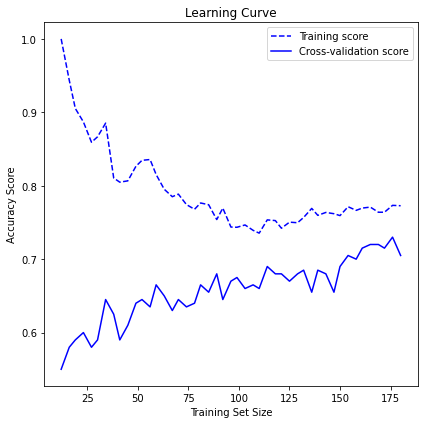

In [35]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(6,6))
plt.plot(train_sizes, train_mean, '--', color='blue',  label="Training score")
plt.plot(train_sizes, test_mean, color='blue', label="Cross-validation score")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()